<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Projetos_Deep_Learning/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula**


In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=740aab9629822638f7a5a5351dd63fbd5a0d1b930d10d8b1e1cb4cd75081c849
  Stored in directory: /root/.cache/pip/wheels/dd/bd/f5/0975fe5179dfa2f996b436596b159824432fb3c1ca74bcf43e
Successfully built np_utils


In [35]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten , Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

In [8]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


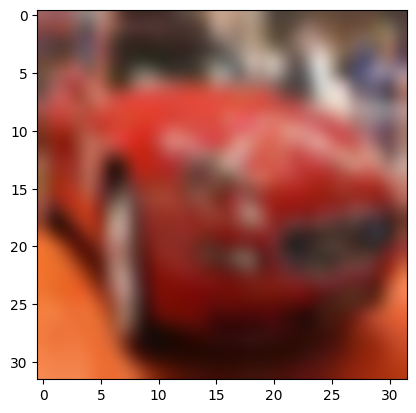

In [9]:
image = X_train[5]
plt.imshow(image, interpolation = 'bicubic')
plt.show()

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/255

In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

y_train.shape

(50000, 10)

In [14]:
modelo = Sequential()
modelo.add(Conv2D(32,(3,3), padding = 'same',activation='relu')) #32 filtros 3 x 3

modelo.add(Conv2D(32,(3,3),activation='relu'))

modelo.add(MaxPooling2D(pool_size = (2,2)))
modelo.add(Dropout(0.25))


modelo.add(Conv2D(64,(3,3), padding = 'same',activation='relu')) #32 filtros 3 x 3

modelo.add(Conv2D(64,(3,3),activation='relu'))

modelo.add(MaxPooling2D(pool_size = (2,2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation = 'relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(10,activation='softmax'))


In [20]:

modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
modelo.fit(X_train, y_train, batch_size = 32 , epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3508 - loss: 1.7642
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5923 - loss: 1.1538
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6577 - loss: 0.9738
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6916 - loss: 0.8748
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7256 - loss: 0.7866
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7438 - loss: 0.7286
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7594 - loss: 0.6777
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7736 - loss: 0.6330
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7909 - loss: 0.5956
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7971 - loss: 0.5727


In [21]:
previsoes = modelo.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [22]:
previsoes_classes = np.argmax(previsoes, axis =1 )

In [23]:
y_test_classes = np.argmax(y_test, axis=1)

In [24]:
accuracy =accuracy_score(y_test_classes, previsoes_classes) * 100

accuracy

76.58

#**Melhorando o modelo**

In [50]:
tuplas_filtros = [(3,3),(5,5),(7,7)]

In [51]:
modelos = []
#Vamos utilizar outro tipo de modelo como por exemplo a classe modelo

for filtro in tuplas_filtros:
  novo_modelo = Sequential()
  #Primerio Bloco de rede neural
  novo_modelo.add(Conv2D(32,filtro, padding = 'same',activation='relu'))
  novo_modelo.add(BatchNormalization())
  novo_modelo.add(Conv2D(32,filtro,activation = 'relu'))
  novo_modelo.add(BatchNormalization())
  novo_modelo.add(MaxPooling2D(pool_size= (2,2)))
  novo_modelo.add(Dropout(0.3))


  #Segundo bloco de rede neural
  novo_modelo.add(Conv2D(64,filtro,padding ='same', activation = 'relu'))
  novo_modelo.add(BatchNormalization())
  novo_modelo.add(Conv2D(64,filtro, activation = 'relu'))
  novo_modelo.add(BatchNormalization())
  novo_modelo.add(MaxPooling2D(pool_size=(2,2)))
  novo_modelo.add(Dropout(0.4))



  #Para a classificação:
  novo_modelo.add(Flatten())
  novo_modelo.add(Dense(512,activation = 'relu', kernel_regularizer = regularizers.l2(0.0001)))
  novo_modelo.add(Dropout(0.5))
  novo_modelo.add(Dense(10, activation='softmax'))
  modelos.append(novo_modelo)
#Continuar

In [55]:
for i in modelos:
  print(i)

#Vamos seguir para verificar qual o melhor filtro dentro de 20 epocas

<Sequential name=sequential_6, built=False>
<Sequential name=sequential_7, built=False>
<Sequential name=sequential_8, built=False>


In [57]:
early_stopping = EarlyStopping(monitor = 'loss',mode='min', verbose =1, patience=10)
historicos_array = []

for modelo in modelos:
  modelo.compile(loss='categorical_crossentropy', optimizer='AdamW', metrics= ['accuracy'])
  historico = modelo.fit(X_train, y_train, batch_size = 32 , epochs = 20, callbacks=early_stopping)
  historicos_array.append(historico)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.3649 - loss: 2.0939
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5829 - loss: 1.3157
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6609 - loss: 1.1405
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6961 - loss: 1.0626
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7252 - loss: 1.0170
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7443 - loss: 0.9781
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7590 - loss: 0.9609
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7717 - loss: 0.9353
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7823 - loss: 0.9142
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7916 - loss: 0.8903
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7903 - loss: 0.8926
Epoch 12/20
1563/1563 ━━━━━━

In [62]:
historicos_array

In [31]:
previsoes = novo_modelo.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [32]:
previsoes_classes = np.argmax(previsoes, axis =1 )

In [33]:
y_test_classes = np.argmax(y_test, axis=1)

In [34]:
accuracy =accuracy_score(y_test_classes, previsoes_classes)

accuracy

0.8224

,accuracy,loss
0,0.85186,0.764781
1,0.85270,0.766933
2,0.85384,0.761158
3,0.85376,0.768292
4,0.85454,0.765684
5,0.85522,0.765108
6,0.85494,0.763731
7,0.85620,0.766183
8,0.85792,0.760146
9,0.85856,0.760385


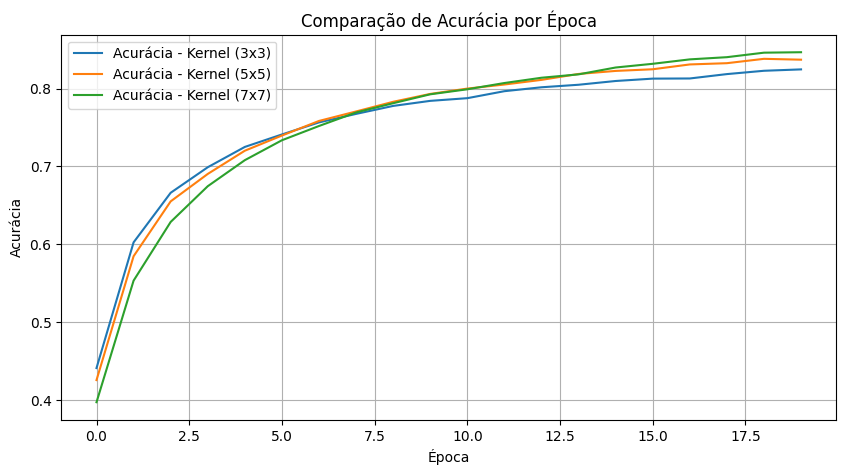

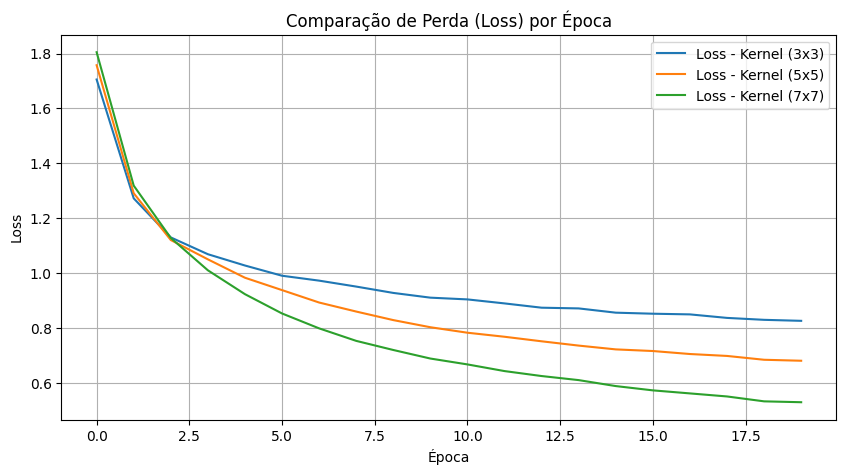

In [64]:
import matplotlib.pyplot as plt

# Supondo que você tenha treinado três modelos e armazenado os históricos em uma lista
# Exemplo: historicos_array = [historico_3x3, historico_5x5, historico_7x7]
# Cada 'historico' é um objeto do tipo History retornado por model.fit()

labels = ['Kernel (3x3)', 'Kernel (5x5)', 'Kernel (7x7)']

# Plotando Acurácia
plt.figure(figsize=(10, 5))
for historico, label in zip(historicos_array, labels):
    plt.plot(historico.history['accuracy'], label=f'Acurácia - {label}')
plt.title('Comparação de Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Plotando Perda (Loss)
plt.figure(figsize=(10, 5))
for historico, label in zip(historicos_array, labels):
    plt.plot(historico.history['loss'], label=f'Loss - {label}')
plt.title('Comparação de Perda (Loss) por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


{'accuracy': [0.851859986782074,
  0.8526999950408936,
  0.8538399934768677,
  0.8537600040435791,
  0.8545399904251099,
  0.8552200198173523,
  0.8549399971961975,
  0.8561999797821045,
  0.8579199910163879,
  0.8585600256919861,
  0.8574399948120117,
  0.859000027179718,
  0.85971999168396,
  0.8578000068664551,
  0.8574600219726562,
  0.8618000149726868,
  0.8567799925804138,
  0.8609799742698669,
  0.8580999970436096,
  0.8612800240516663,
  0.8615800142288208,
  0.8629599809646606,
  0.8639799952507019,
  0.8629999756813049,
  0.8621000051498413,
  0.8619400262832642,
  0.8622400164604187,
  0.8617200255393982,
  0.8622199892997742,
  0.863099992275238,
  0.8641200065612793,
  0.8629400134086609,
  0.8656600117683411,
  0.864139974117279,
  0.8632000088691711,
  0.8676599860191345,
  0.8658999800682068,
  0.8666399717330933,
  0.865339994430542,
  0.866599977016449,
  0.8644800186157227,
  0.8669599890708923,
  0.8687999844551086,
  0.8684599995613098,
  0.8683599829673767,
  0.86